# Agrupación de datos

In [1]:
import numpy as np
import pandas as pd

In [2]:
# crearemos 2 categorias en un data set dummy
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n=500 #numero de filas
gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [5]:
gender_data[1:10]

['Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male']

In [6]:
income_data[:10]

['Poor',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Rich',
 'Rich',
 'Middle Class',
 'Rich']

In [7]:
# aqui utilizamos el primer dato como media y el 2do como la desviación
heigt = 160 + 30* np.random.randn(n)  # media de 160 cm y desviacion de 30 cm
weight = 65 + 25* np.random.randn(n)
age = 30 + 12* np.random.randn(n)
income = 1800 + 3500 * np.random.randn(n)

In [8]:
data = pd.DataFrame(
{
    "Gender": gender_data,
    "Economic Status": income_data,
    "Height": heigt,
    "Weight": weight,
    "Age": age,
    "Income": income
})

In [9]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,143.027962,89.050377,32.821766,290.429439
1,Male,Poor,157.811092,67.608499,13.004980,-902.447432
2,Female,Middle Class,193.869421,20.968402,21.077689,3314.171374
3,Female,Middle Class,149.699911,68.717027,36.317884,7534.952026
4,Male,Middle Class,173.414587,67.400225,5.037629,2667.637941


Ya hemos creado un dummy dataset como corresponde!

## Agrupacion de datos

In [12]:
grouped_gender = data.groupby("Gender")  # crea un objeto de dos atributos, el nombre y grupo. 

In [15]:
grouped_gender.groups

{'Female': Int64Index([  0,   2,   3,  10,  12,  13,  16,  19,  20,  22,
             ...
             471, 476, 480, 484, 490, 491, 494, 495, 498, 499],
            dtype='int64', length=266),
 'Male': Int64Index([  1,   4,   5,   6,   7,   8,   9,  11,  14,  15,
             ...
             483, 485, 486, 487, 488, 489, 492, 493, 496, 497],
            dtype='int64', length=234)}

 nos muestra los indices de cada grupo que genero, es decir los indices de las filas mujes y los de los hombres

In [16]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age       Income
0    Female            Poor  143.027962  89.050377  32.821766   290.429439
2    Female    Middle Class  193.869421  20.968402  21.077689  3314.171374
3    Female    Middle Class  149.699911  68.717027  36.317884  7534.952026
10   Female            Poor  195.136399  49.273770  19.178179  -197.032066
12   Female    Middle Class  164.548564  49.554682   7.865793  1929.758984
..      ...             ...         ...        ...        ...          ...
491  Female    Middle Class  163.490707  83.933774   9.246235  -171.667985
494  Female    Middle Class  204.346692  61.933468  26.244031 -3378.933495
495  Female            Rich  116.803654  99.627889  19.492380  3531.925431
498  Female            Rich  114.575422  72.592275  12.024012  -838.105904
499  Female            Poor  143.304416  59.974753  21.418614  -421.217179

[266 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight        Age   

In [18]:
grouped_gender.get_group("Female")  # genera un data frame solo de mujeres

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,143.027962,89.050377,32.821766,290.429439
2,Female,Middle Class,193.869421,20.968402,21.077689,3314.171374
3,Female,Middle Class,149.699911,68.717027,36.317884,7534.952026
10,Female,Poor,195.136399,49.273770,19.178179,-197.032066
12,Female,Middle Class,164.548564,49.554682,7.865793,1929.758984
...,...,...,...,...,...,...
491,Female,Middle Class,163.490707,83.933774,9.246235,-171.667985
494,Female,Middle Class,204.346692,61.933468,26.244031,-3378.933495
495,Female,Rich,116.803654,99.627889,19.492380,3531.925431
498,Female,Rich,114.575422,72.592275,12.024012,-838.105904


Veamos ahora como agrupar por más de una categoria

In [20]:
double_group=data.groupby(["Gender","Economic Status"])

In [21]:
len(double_group)

6

In [22]:
for names,grups in double_group:
    print(names)
    print(grups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
2    Female    Middle Class  193.869421  20.968402  21.077689   3314.171374
3    Female    Middle Class  149.699911  68.717027  36.317884   7534.952026
12   Female    Middle Class  164.548564  49.554682   7.865793   1929.758984
13   Female    Middle Class  158.207303  51.982387  36.364687   2299.400096
19   Female    Middle Class  170.765420  84.549803  40.246389   2102.622007
..      ...             ...         ...        ...        ...           ...
458  Female    Middle Class  211.771386  47.801790  34.173672  -2599.128567
460  Female    Middle Class  172.733393  78.146595  12.058820  13989.811049
464  Female    Middle Class  184.839940  23.836954  42.403267   5614.584092
491  Female    Middle Class  163.490707  83.933774   9.246235   -171.667985
494  Female    Middle Class  204.346692  61.933468  26.244031  -3378.933495

[94 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

# Operaciones sobre datos agrupados

In [23]:
double_group.sum()

Height       Weight          Age         Income
Gender Economic Status                                                       
Female Middle Class     14946.446068  5870.722155  2712.682901  161430.356818
       Poor             13445.541540  5696.430023  2553.930043  127871.622861
       Rich             13638.288096  5849.256922  2475.363210  192856.435710
Male   Middle Class     13524.431107  5456.773842  2543.139766  174300.860908
       Poor             12887.578993  5278.938461  2484.388374  185007.234142
       Rich             10721.960267  4266.698369  1988.613111  115909.035585

In [24]:
double_group.mean()

Height     Weight        Age       Income
Gender Economic Status                                               
Female Middle Class     159.004745  62.454491  28.858329  1717.344221
       Poor             158.182842  67.016824  30.046236  1504.372034
       Rich             156.761932  67.232838  28.452451  2216.740640
Male   Middle Class     159.110954  64.197339  29.919291  2050.598364
       Poor             157.165597  64.377298  30.297419  2256.185782
       Rich             160.029258  63.682065  29.680793  1729.985606

In [25]:
double_group.size()

Gender  Economic Status
Female  Middle Class       94
        Poor               85
        Rich               87
Male    Middle Class       85
        Poor               82
        Rich               67
dtype: int64

In [27]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      94.0  159.004745  25.631455  90.541209  142.083919   
       Poor              85.0  158.182842  30.235435  77.783479  138.540733   
       Rich              87.0  156.761932  37.182464  65.961251  134.541297   
Male   Middle Class      85.0  159.110954  29.391773  88.711270  133.830824   
       Poor              82.0  157.165597  27.773504  68.263990  143.143190   
       Rich              67.0  160.029258  28.652219  93.080275  139.619678   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     159.384068  175.514564  212.829730   94.0  62.454491   
       Poor             160.470296  179.866479  224.520467   85.0  67.016824   
       Rich             155.216464  180.707374  265.228381   87.0  67.232838   
Male   Middle Class     162.306241  177.865037  221.542481   85.0  64.197339   
       Poor             158.019470  173.921490  215.672505   82.0  64.377298   
       Rich             154.832644  182.346689  228.386981   67.0  63.682065   

                        ...        Age            Income               \
                        ...        75%        max  count         mean   
Gender Economic Status  ...                                             
Female Middle Class     ...  35.668509  59.059758   94.0  1717.344221   
       Poor             ...  37.070289  54.405530   85.0  1504.372034   
       Rich             ...  35.882161  63.779071   87.0  2216.740640   
Male   Middle Class     ...  36.174325  67.149958   85.0  2050.598364   
       Poor             ...  38.481220  64.966290   82.0  2256.185782   
       Rich             ...  36.145187  58.291928   67.0  1729.985606   

                                                                           \
                                std          min         25%          50%   
Gender Economic Status                                                      
Female Middle Class     3574.063540 -8271.911080 -211.726587  1967.245669   
       Poor             3548.240867 -8771.808541 -598.549550  1244.694369   
       Rich             3408.822884 -7336.389574  275.119918  2655.632223   
Male   Middle Class     3314.457775 -6896.909024  -59.865233  2079.818241   
       Poor             3488.584679 -7872.568758   95.919270  2208.526493   
       Rich             3292.708923 -5494.767220 -267.314151  2105.493797   

                                                   
                                75%           max  
Gender Economic Status                             
Female Middle Class     3561.974391  13989.811049  
       Poor             3745.219224  10517.976079  
       Rich             4204.251315  11271.181148  
Male   Middle Class     4467.864156   9657.613328  
       Poor             4636.173718   9041.630210  
       Rich             4022.110764   9921.280068  

[6 rows x 32 columns]

In [28]:
grouped_income= double_group["Income"]

In [29]:
grouped_income.describe()

count         mean          std          min  \
Gender Economic Status                                                 
Female Middle Class      94.0  1717.344221  3574.063540 -8271.911080   
       Poor              85.0  1504.372034  3548.240867 -8771.808541   
       Rich              87.0  2216.740640  3408.822884 -7336.389574   
Male   Middle Class      85.0  2050.598364  3314.457775 -6896.909024   
       Poor              82.0  2256.185782  3488.584679 -7872.568758   
       Rich              67.0  1729.985606  3292.708923 -5494.767220   

                               25%          50%          75%           max  
Gender Economic Status                                                      
Female Middle Class    -211.726587  1967.245669  3561.974391  13989.811049  
       Poor            -598.549550  1244.694369  3745.219224  10517.976079  
       Rich             275.119918  2655.632223  4204.251315  11271.181148  
Male   Middle Class     -59.865233  2079.818241  4467.864156   9657.613328  
       Poor              95.919270  2208.526493  4636.173718   9041.630210  
       Rich            -267.314151  2105.493797  4022.110764   9921.280068

In [30]:
double_group.aggregate(
{
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic Status                                     
Female Middle Class     161430.356818  28.858329  25.631455
       Poor             127871.622861  30.046236  30.235435
       Rich             192856.435710  28.452451  37.182464
Male   Middle Class     174300.860908  29.919291  29.391773
       Poor             185007.234142  30.297419  27.773504
       Rich             115909.035585  29.680793  28.652219

In [33]:
double_group.aggregate(
{
    "Age": np.mean,
    "Height": lambda h:np.mean(h)/np.std(h)
})

Age    Height
Gender Economic Status                     
Female Middle Class     28.858329  6.236764
       Poor             30.046236  5.262753
       Rich             28.452451  4.240459
Male   Middle Class     29.919291  5.445580
       Poor             30.297419  5.693656
       Rich             29.680793  5.627384

In [35]:
double_group.aggregate([np.sum,np.mean,np.std]) # se aplican estas funciones a todas las variables

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14946.446068  159.004745  25.631455  5870.722155   
       Poor             13445.541540  158.182842  30.235435  5696.430023   
       Rich             13638.288096  156.761932  37.182464  5849.256922   
Male   Middle Class     13524.431107  159.110954  29.391773  5456.773842   
       Poor             12887.578993  157.165597  27.773504  5278.938461   
       Rich             10721.960267  160.029258  28.652219  4266.698369   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     62.454491  22.977355  2712.682901  28.858329   
       Poor             67.016824  22.883337  2553.930043  30.046236   
       Rich             67.232838  26.433389  2475.363210  28.452451   
Male   Middle Class     64.197339  24.086928  2543.139766  29.919291   
       Poor             64.377298  24.225141  2484.388374  30.297419   
       Rich             63.682065  28.664348  1988.613111  29.680793   

                                          Income                            
                              std            sum         mean          std  
Gender Economic Status                                                      
Female Middle Class     11.836390  161430.356818  1717.344221  3574.063540  
       Poor             11.546903  127871.622861  1504.372034  3548.240867  
       Rich             13.108899  192856.435710  2216.740640  3408.822884  
Male   Middle Class     13.381028  174300.860908  2050.598364  3314.457775  
       Poor             12.672118  185007.234142  2256.185782  3488.584679  
       Rich             12.470788  115909.035585  1729.985606  3292.708923

In [36]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     6.236764  2.732663  2.451175  0.483078
       Poor             5.262753  2.946011  2.617546  0.426493
       Rich             4.240459  2.558227  2.183051  0.654065
Male   Middle Class     5.445580  2.681053  2.249218  0.622355
       Poor             5.693656  2.673812  2.405586  0.650714
       Rich             5.627384  2.238415  2.397988  0.529364

## Filtrado de datos

In [37]:
double_group.sum()

Height       Weight          Age         Income
Gender Economic Status                                                       
Female Middle Class     14946.446068  5870.722155  2712.682901  161430.356818
       Poor             13445.541540  5696.430023  2553.930043  127871.622861
       Rich             13638.288096  5849.256922  2475.363210  192856.435710
Male   Middle Class     13524.431107  5456.773842  2543.139766  174300.860908
       Poor             12887.578993  5278.938461  2484.388374  185007.234142
       Rich             10721.960267  4266.698369  1988.613111  115909.035585

In [39]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      32.821766
1      13.004980
2      21.077689
3      36.317884
4       5.037629
         ...    
494    26.244031
495    19.492380
497    48.632649
498    12.024012
499    21.418614
Name: Age, Length: 433, dtype: float64

## Transformacion de variables


In [42]:
zscore= lambda x : (x-x.mean()/x.std())

In [46]:
z_group = double_group.transform(zscore)

In [45]:
import matplotlib.pyplot as plt

(array([  4.,  21.,  39.,  91., 110., 125.,  57.,  31.,  15.,   7.]),
 array([-8.24512662, -0.92921306,  6.3867005 , 13.70261406, 21.01852762,
        28.33444118, 35.65035475, 42.96626831, 50.28218187, 57.59809543,
        64.91400899]),
 <a list of 10 Patch objects>)

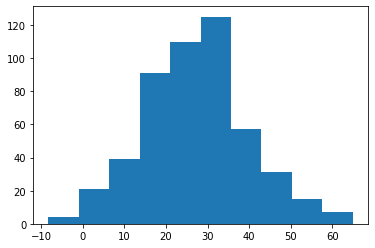

In [47]:
plt.hist(z_group["Age"])

In [48]:
fill_na_mean= lambda x : x.fillna(x.mean())

In [49]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,143.027962,89.050377,32.821766,290.429439
1,157.811092,67.608499,13.004980,-902.447432
2,193.869421,20.968402,21.077689,3314.171374
3,149.699911,68.717027,36.317884,7534.952026
4,173.414587,67.400225,5.037629,2667.637941
...,...,...,...,...
495,116.803654,99.627889,19.492380,3531.925431
496,170.956705,60.089309,31.466873,1861.632421
497,161.470728,19.801694,48.632649,1748.081484
498,114.575422,72.592275,12.024012,-838.105904


## Operaciones diversas utiles

In [51]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,143.027962,89.050377,32.821766,290.429439
1,Male,Poor,157.811092,67.608499,13.004980,-902.447432
2,Female,Middle Class,193.869421,20.968402,21.077689,3314.171374
4,Male,Middle Class,173.414587,67.400225,5.037629,2667.637941
5,Male,Rich,140.052407,38.927991,25.406772,-1603.774284
16,Female,Rich,138.674223,71.936494,42.349861,1049.231100


In [54]:
double_group.nth(32)  #veo el elemento 32, si excedo el numero no mostrara esa columna o fila

Height      Weight        Age       Income
Gender Economic Status                                                
Female Middle Class     190.352505   87.325805  21.442478  2843.486937
       Poor             186.840570   45.506727  31.205847  5995.970878
       Rich             153.926782  114.966317  11.614245 -4248.394048
Male   Middle Class     141.988060   41.042510  29.398162   203.904200
       Poor             132.526716   93.515472  61.261617  8508.846104
       Rich             144.061155   -1.301984  24.278822 -2565.235098

In [60]:
data_sorted =data.sort_values(["Age","Income"])  # menor a mayor distintos valores

In [61]:
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
320,Female,Poor,166.099924,48.828242,-5.643023,-447.761744
415,Male,Poor,129.846259,110.894939,-4.245229,3712.582792
132,Female,Rich,229.077845,86.069618,-3.214726,2444.944396
312,Female,Rich,98.159454,77.921940,0.861991,1932.089489
261,Female,Rich,166.168592,55.091248,2.151637,4716.591095


In [62]:
age_grouped = data_sorted.groupby("Gender")

In [65]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
320,Female,Poor,166.099924,48.828242,-5.643023,-447.761744
415,Male,Poor,129.846259,110.894939,-4.245229,3712.582792


In [66]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
379,Female,Rich,201.642321,93.350254,63.779071,5702.232336
197,Male,Middle Class,160.280311,72.163696,67.149958,4623.752337


# Conjunto de entrenamiento y conjunto de testing

In [67]:
import pandas as pd

In [68]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [69]:
len(data)

3333

# Dividir utilizando la distribución normal

In [79]:
import matplotlib.pyplot as plt
a = np.random.randn(len(data))

(array([  4.,  34., 187., 550., 886., 920., 522., 195.,  33.,   2.]),
 array([-3.72531332, -2.98463988, -2.24396643, -1.50329299, -0.76261955,
        -0.02194611,  0.71872734,  1.45940078,  2.20007422,  2.94074766,
         3.68142111]),
 <a list of 10 Patch objects>)

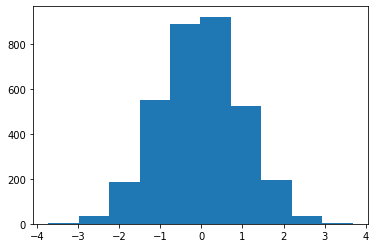

In [80]:
plt.hist(a)

In [81]:
check = (a<0.8)    # me quedo con los objetos son menores que 0.8

In [82]:
check

array([False,  True,  True, ...,  True,  True,  True])

In [88]:
training = data[check]
testing  = data[~check]   # los que no son check

In [89]:
len(training)

2667

In [90]:
len(testing)

666

Con esto dividimos el data set en 2 el 80% para entrenar y el 20% para testear

# Con libreria sklearn

In [92]:
from sklearn.model_selection import train_test_split

In [94]:
train, test = train_test_split(data,test_size=0.2)

In [95]:
len(train)

2666

In [96]:
len(test)

667

## Usando una función de shuffle

In [99]:
import sklearn 

In [100]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [102]:
data = sklearn.utils.shuffle(data)   #desordena las filas

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3118,ND,131,408,393-9548,no,yes,33,177.1,100,30.11,...,85,16.49,253.4,124,11.40,5.2,5,1.40,1,False.
116,NJ,64,510,391-4652,no,no,0,162.6,83,27.64,...,109,12.95,57.5,122,2.59,14.2,3,3.83,1,False.
299,MN,94,415,412-4399,no,no,0,181.5,98,30.86,...,88,16.99,287.7,114,12.95,6.6,5,1.78,1,False.
1010,ND,105,510,345-2108,no,no,0,246.4,83,41.89,...,101,21.78,169.0,151,7.61,3.8,4,1.03,0,False.
2715,NH,97,408,410-7553,no,yes,28,283.1,93,48.13,...,98,15.76,312.8,78,14.08,6.1,8,1.65,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,MN,24,510,396-4460,no,yes,25,164.9,110,28.03,...,105,17.79,231.2,55,10.40,6.7,9,1.81,1,False.
2499,CA,120,415,375-5547,no,no,0,252.1,110,42.86,...,103,19.22,155.6,83,7.00,13.8,3,3.73,1,False.
1933,PA,119,408,377-5043,no,no,0,260.1,101,44.22,...,68,21.80,229.1,89,10.31,10.0,2,2.70,1,True.
722,KY,113,415,385-4715,no,no,0,215.6,96,36.65,...,127,16.44,105.4,115,4.74,13.5,3,3.65,1,False.


In [103]:
cut_id=int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id:]

In [104]:
len(train_data)

2499

In [105]:
len(test_data)

834